In [4]:
import random
import torch
import torch.optim as optim
import numpy as np

SIZE = 1000
data = np.zeros((SIZE, 2))
label = np.zeros((SIZE,1))

w = [2.0, -3.4]
b = 4.2

for i in range(SIZE):
    data[i][0] = random.normalvariate(0,1)
    data[i][1] = random.normalvariate(0,1)
    noise = random.normalvariate(0,0.01)
    
    label[i] = (np.dot(data[i], w)+b+noise)



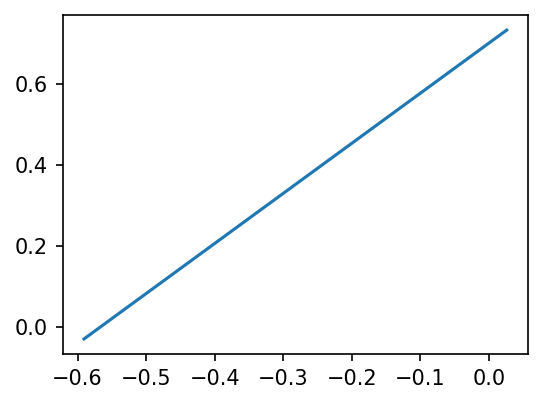

In [5]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(figsize=(4,3),facecolor='white',dpi=150)

plt.plot(data[0], data[1])



plt.show()

In [6]:
import torch.nn as nn

def MSE(y, pred_y):
    pred_y = torch.reshape(pred_y, y.shape)
    ans=((y-pred_y)**2).sum()
    return ans.float()

def dataloader(X, y, batch_size = 4):
    load = []
    num = int(SIZE/batch_size)
    for i in range(num):
        load.append([torch.tensor(X[i*batch_size:(i+1)*batch_size],requires_grad = True),
                     torch.tensor(y[i*batch_size:(i+1)*batch_size])])
    return load
        

pred_w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
pred_b = torch.zeros(1, requires_grad=True)
print(pred_w)
print(pred_b)

optimizer = optim.SGD([pred_w, pred_b], lr = 0.001)
train = dataloader(data, label)
#criterion = nn.MSELoss()

epoch_num = 20
running_loss = np.zeros(epoch_num)

for epoch in range(epoch_num):
    for tmp in train:
        X, y = tmp[0], tmp[1]
        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            outputs = torch.matmul(X.float(), pred_w.float())+pred_b
            loss = MSE(outputs.float(), y.float())
        
        loss.backward()
        optimizer.step()
        running_loss[epoch] += loss.item()/(SIZE/4) 
        
print(running_loss)

tensor([[-0.0067],
        [-0.0132]], requires_grad=True)
tensor([0.], requires_grad=True)
[3.27238454e+01 6.28788603e-01 1.33779505e-02 6.98471651e-04
 4.15088349e-04 4.07758922e-04 4.07443176e-04 4.07415294e-04
 4.07406982e-04 4.07407078e-04 4.07406485e-04 4.07406485e-04
 4.07406485e-04 4.07406485e-04 4.07406485e-04 4.07406485e-04
 4.07406485e-04 4.07406485e-04 4.07406485e-04 4.07406485e-04]


In [7]:
print("w, b")
print(w)
print(b)

print("pred_w, pred_b")
print(pred_w)
print(pred_b)

w, b
[2.0, -3.4]
4.2
pred_w, pred_b
tensor([[ 2.0004],
        [-3.4000]], requires_grad=True)
tensor([4.2005], requires_grad=True)


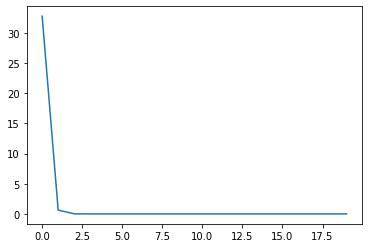

In [8]:
plt.plot(running_loss)